# Training


### Building and compiling a model

In [1]:
%%capture
import h5py
from chimeranet.model import ChimeraPPModel

# probe shape of dataset and set embedding dimension
dataset_path = 'example-dataset.hdf5'
with h5py.File(dataset_path, 'r') as f:
    _, C, F, T = f['specs_train'].shape
D = 20
cm = ChimeraPPModel(T, F, C, D)

# build_model returns Keras' Model object
model = cm.build_model(mask='softmax')
model.compile(
    'rmsprop',
    loss={
        'embedding': cm.loss_deepclustering(),
        'mask': cm.loss_mask()
    },
    loss_weights={
        'embedding': 0.9,
        'mask': 0.1
    }
)

### Training a model

In [2]:
from chimeranet.preprocessing import to_mixture, to_true_pair

# load data first
with h5py.File(dataset_path, 'r') as f:
    specs_train = f['specs_train'][()]
    specs_validation = f['specs_validation'][()]

x_train = to_mixture(specs_train)
y_train = to_true_pair(specs_validation, noise=1e-16, mask='softmax')
x_validation = to_mixture(specs_validation)
y_validation = to_true_pair(specs_validation, noise=1e-16, mask='softmax')

# train model by model.fit function
history = model.fit(
    x=x_train,
    y=y_train,
    validation_data=(x_validation, y_validation),
    batch_size=32,
    epochs=10
)
# save the model
model_path = 'example-model.hdf5'
model.save(model_path)

Train on 320 samples, validate on 320 samples
Epoch 1/10
320/320 [==============================] - 229s 714ms/step - loss: 17003.3059 - embedding_loss: 10783.3487 - mask_loss: 72982.9227 - val_loss: 13945.3063 - val_embedding_loss: 8448.1246 - val_mask_loss: 63419.9402
Epoch 2/10
320/320 [==============================] - 220s 686ms/step - loss: 16263.3183 - embedding_loss: 9501.0065 - mask_loss: 77124.1242 - val_loss: 13968.2887 - val_embedding_loss: 8483.1206 - val_mask_loss: 63334.8023
Epoch 3/10
320/320 [==============================] - 229s 717ms/step - loss: 13858.2923 - embedding_loss: 8357.1154 - mask_loss: 63368.8863 - val_loss: 13331.5953 - val_embedding_loss: 8231.6581 - val_mask_loss: 59231.0293
Epoch 4/10
320/320 [==============================] - 228s 711ms/step - loss: 13583.9371 - embedding_loss: 8371.6234 - mask_loss: 60494.7609 - val_loss: 13335.9337 - val_embedding_loss: 8207.0659 - val_mask_loss: 59495.7453
Epoch 5/10
320/320 [==============================] - 266

### Showing learning curve

Also, you can plot learning curve. for more information, see keras documentation

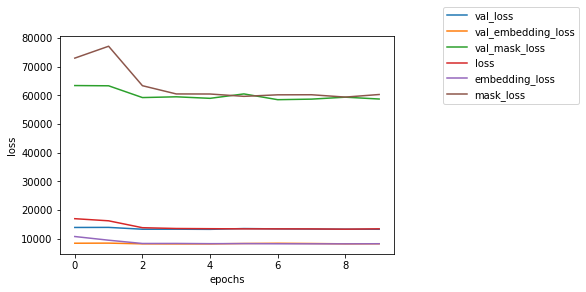

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
for k, v in history.history.items():
    plt.plot(v, label=k)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)